In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split

# Dataset 
- UCI adult
- UCI housing 

In [2]:
housing_names = ["f" + str(i) for i in range(13)] + ["price"]
adult_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]
housing = pd.read_fwf("housing.fwf", names=housing_names)
adult = pd.read_csv("adult.data", names=adult_names)

In [3]:
print("housing size:",housing.shape)
print("adult size:",adult.shape)

housing size: (506, 14)
adult size: (32561, 15)


In [4]:
adult.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
15587,48,Private,204990,HS-grad,9,Never-married,Tech-support,Unmarried,Black,Female,0,0,33,Jamaica,<=50K
18254,28,Private,129460,9th,5,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
28247,47,Private,264244,HS-grad,9,Married-spouse-absent,Craft-repair,Not-in-family,Black,Female,0,0,40,United-States,<=50K


In [5]:
housing.sample(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,price
477,5.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,4,666.0,20.2,349.48,24.91,12.0
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41,17.3
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4


# Preprocessing

## Convert to categorical datatype

In [6]:
encoder = LabelEncoder()

for col in adult_names:
    if adult[col].dtype == "object":
        adult[col] = encoder.fit_transform(adult[col])

## Normalization

In [7]:
scaler = MinMaxScaler()
adult = scaler.fit_transform(adult)
housing = scaler.fit_transform(housing)

## Train test split

In [8]:
X_adult, y_adult = adult[:, :-1], adult[:, -1]
X_housing, y_housing = housing[:, :-1], housing[:, -1]
print(X_adult.shape, y_adult.shape)
print(X_housing.shape, y_housing.shape)

(32561, 14) (32561,)
(506, 13) (506,)


In [9]:
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.8)
x_train_housing, x_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, train_size=0.8)

In [10]:
x_train_adult.shape, x_test_adult.shape, y_train_adult.shape, y_test_adult.shape

((26048, 14), (6513, 14), (26048,), (6513,))

In [16]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.xticks(list(range(0, len(history.history[metrics[0]]), 2)))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

## Modeling

### 1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

1.1. DT classifier

In [25]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_adult, y_train_adult)

DecisionTreeClassifier()

In [26]:
y_pred_dtc = dt_clf.predict(x_test_adult)
dtc_result = accuracy_score(y_pred=y_pred_dtc, y_true=y_test_adult)

In [27]:
dtc_result

0.8106863196683556

1.2. DT regressor

In [29]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train_adult, y_train_adult)

DecisionTreeRegressor()

In [30]:
y_pred_dtr = dt_reg.predict(x_test_adult)
dtr_result = accuracy_score(y_pred=y_pred_dtr, y_true=y_test_adult)

In [32]:
y_pred_dtr

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
dtr_result

0.8125287885766928

### 2. KNN 

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNC, KNeighborsRegressor as KNR

In [ ]:
knc = KNC(n_neighbors=10)
knr = KNR(n_neighbors=8)


### 3. Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [34]:
lnr = LinearRegression()
lnr.fit(x_train_housing, y_train_housing)

LinearRegression()

In [35]:
y_pred_lnr = lnr.predict(x_test_housing)
lnr_result = mse(y_pred_lnr, y_test_housing)
print(lnr_result)

0.015242395190135653


### 4. Logistic Regression

In [37]:
lgr = LogisticRegression()
lgr.fit(x_train_adult, y_train_adult)

LogisticRegression()

In [39]:
y_pred_lgr = lgr.predict(x_test_adult)
lgr_result = accuracy_score(y_pred=y_pred_lgr, y_true=y_test_adult)
print(lgr_result)

0.8217411331183786


### 5. Naive Bayes Classification

### 6. SVM

In [41]:
from sklearn.svm import LinearSVC

In [42]:
svm = LinearSVC()
svm.fit(x_train_adult, y_train_adult)

LinearSVC()

In [44]:
y_pred_svm = svm.predict(x_test_adult)
svm_result = accuracy_score(y_pred=y_pred_svm, y_true=y_test_adult)
print(svm_result)

0.8212805158912944


### 7. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### 8. MLP[1] - Classification - adult dataset

In [11]:
mlp1 = Sequential([
    Dense(units=32, input_dim= X_adult.shape[1], activation="relu", name="fc1"),
    Dense(units=16,activation="relu",name="fc2"),
    Dense(units=8, activation="relu",name="fc3"),
    Dense(units=2, activation="softmax",name="output")
])
mlp1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 32)                480       
                                                                 
 fc2 (Dense)                 (None, 16)                528       
                                                                 
 fc3 (Dense)                 (None, 8)                 136       
                                                                 
 output (Dense)              (None, 2)                 18        
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [12]:
mlp1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
history_mlp1 = mlp1.fit(x_train_adult, y_train_adult, epochs=10, verbose=0, validation_split=0.2)

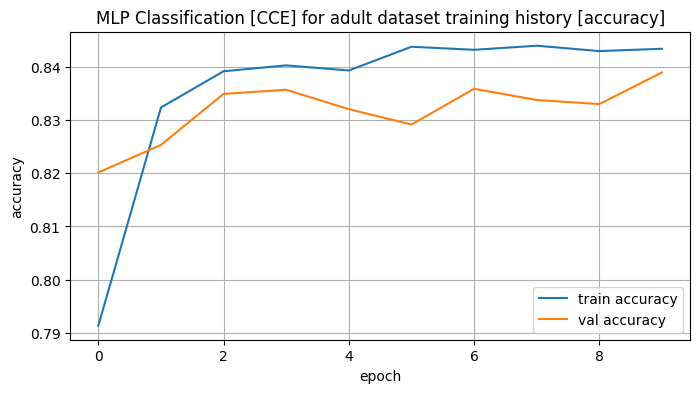

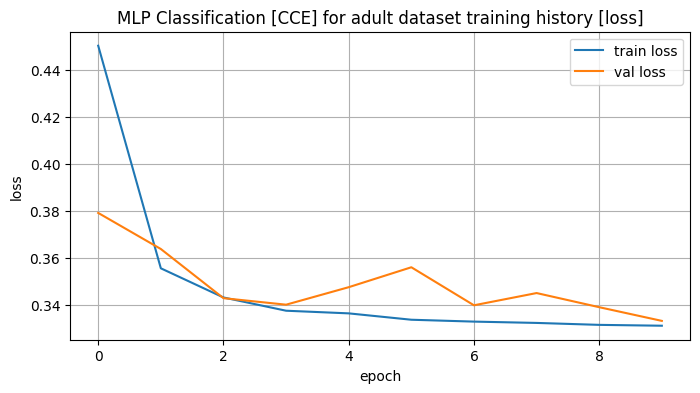

In [17]:
plot_history(history_mlp1, metrics=["accuracy"], model_name="MLP Classification [CCE] for adult dataset")
plot_history(history_mlp1, metrics=["loss"],model_name="MLP Classification [CCE] for adult dataset")

In [18]:
# model 2
result_mlp1 = mlp1.evaluate(x_test_adult, y_test_adult)

204/204 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8541


### 8. MLP[2] - Classification - housing dataset

In [19]:
mlp2 = Sequential([
    Dense(units=16, input_dim= X_housing.shape[1], activation="relu", name="fc1"),
    Dense(units=8, activation="relu", name="fc2"),
    Dense(units=1, name="output")
])
mlp2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                224       
                                                                 
 fc2 (Dense)                 (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [20]:
mlp2.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

In [21]:
history_mlp2 = mlp2.fit(x_train_housing, y_train_housing, epochs=35, verbose=0, validation_split=0.2)

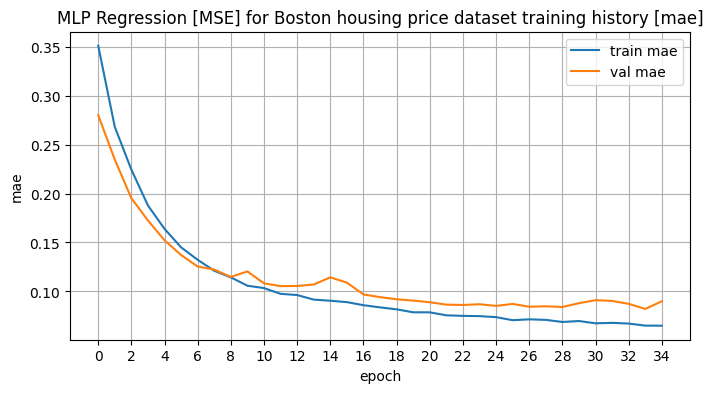

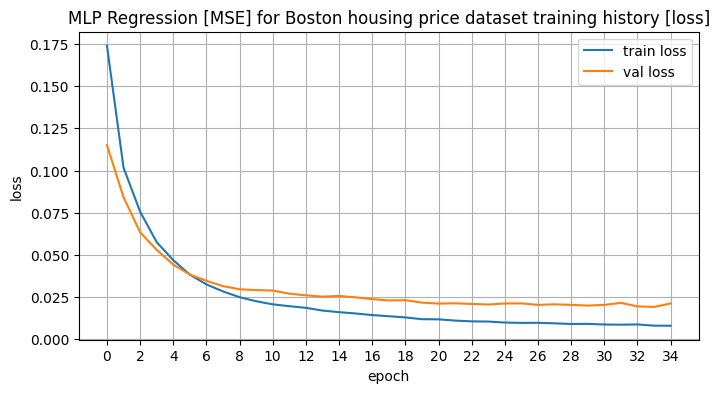

In [22]:
plot_history(history_mlp2, metrics=["mae"], model_name="MLP Regression [MSE] for Boston housing price dataset")
plot_history(history_mlp2, metrics=["loss"], model_name="MLP Regression [MSE] for Boston housing price dataset")

In [23]:
result_hs_mse = mlp2.evaluate(x_test_housing, y_test_housing)

4/4 [==============================] - 0s 2ms/step - loss: 0.0174 - mae: 0.0845


## Result

In [40]:
methods = [
    "Decision Tree",
    "kNN",
    "Linear Regression",
    "Logistic Regression",
    "Naive Bayesian Classification",
    "Support Vector Machine",
    "Random Forest",
    "Neural Network (Multilayer Perceptron)"
]